In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
import numpy as np
from pathlib import Path
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [3]:
IMAGE_RESIZE = 224
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100
EARLY_STOP_PATIENCE = 3
RESNET50_POOLING_AVERAGE = 'avg'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

In [4]:
#mount google drive
from google.colab import drive
drive.mount("/content/gdrive") 

Mounted at /content/gdrive


In [5]:
#define paths
from pathlib import Path
import os, shutil
from keras.preprocessing import image
os.mkdir('./test')
positive_path = Path('/content/gdrive/My Drive/ML_assignment_data/with_mask')
negative_path = Path('/content/gdrive/My Drive/ML_assignment_data/without_mask')

images = []

In [9]:
train_generator = data_generator.flow_from_directory(
        '/content/gdrive/My Drive/ML_assignment_data',
        target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
        batch_size=BATCH_SIZE_TRAINING,
         subset='training',
        class_mode='categorical')
validation_generator = data_generator.flow_from_directory(
        '/content/gdrive/My Drive/ML_assignment_data',
        target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
        batch_size=BATCH_SIZE_VALIDATION,
        subset='validation',
        class_mode='categorical') 



Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [10]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(100, 61, 100, 16)

In [11]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [12]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

model.add(Dense(2, activation = "softmax"))

model.layers[0].trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [13]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
#10 steps per epoch and total 10 steps
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=10,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights("best.hdf5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
 3/10 [========>.....................] - ETA: 4:36 - loss: 1.7432 - accuracy: 0.4650

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.8441 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 716s 77s/step - loss: 0.5107 - accuracy: 0.8441 - val_loss: 0.0589 - val_accuracy: 0.9900
Epoch 2/10
10/10 [==============================] - 462s 46s/step - loss: 0.0225 - accuracy: 0.9900 - val_loss: 0.0682 - val_accuracy: 0.9850
Epoch 3/10
10/10 [==============================] - 406s 41s/step - loss: 0.0557 - accuracy: 0.9880 - val_loss: 0.0649 - val_accuracy: 0.9890
Epoch 4/10
10/10 [==============================] - 364s 37s/step - loss: 0.0443 - accuracy: 0.9870 - val_loss: 0.0430 - val_accuracy: 0.9900
Epoch 5/10
10/10 [==============================] - 318s 32s/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 0.0585 - val_accuracy: 0.9910
Epoch 6/10
10/10 [==============================] - 296s 30s/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0759 - val_accuracy: 0.9940
Epoch 7/10
10/10 [==============================] - 280s 29s/step - loss: 0.0305 - accuracy: 0.9950 - val_loss: 0.0907 - val_accuracy: 0.9880


In [15]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


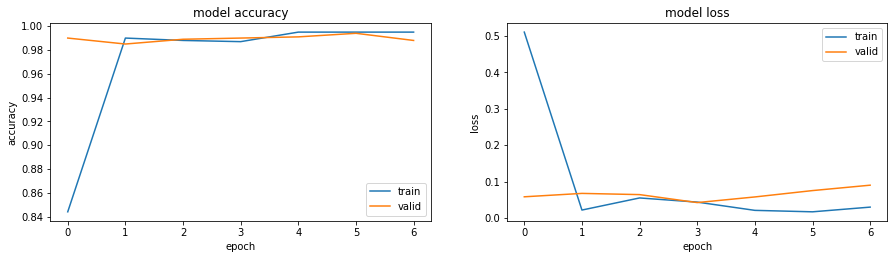

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()